In [1]:
import numpy as np
import pandas as pd
import zipfile
import pathlib
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("dataset.csv")

In [5]:
df.head(10)

,RANK,NAME,LANGUAGE,TYPE,MOST_STREAMED_GAME,2ND_MOST_STREAMED_GAME,AVERAGE_STREAM_DURATION,FOLLOWERS_GAINED_PER_STREAM,AVG_VIEWERS_PER_STREAM,AVG_GAMES_PER_STREAM,TOTAL_TIME_STREAMED,TOTAL_FOLLOWERS,TOTAL_VIEWS,TOTAL_GAMES_STREAMED,ACTIVE_DAYS_PER_WEEK,MOST_ACTIVE_DAY,DAY_WITH_MOST_FOLLOWERS_GAINED
0,1,kaicenat,English,personality,Just Chatting,I'm Only Sleeping,7.6,18.405,15.852,2.3,4.698,10600000,9150000,194,3.6,Friday,Saturday
1,2,jynxzi,English,personality,Tom Clancy's Rainbow Six Siege,NBA 2K20,5.4,3.386,1.145,1.2,8.407,5760000,1950000,54,5.6,Tuesday,Sunday
2,3,caedrel,English,personality,League of Legends,I'm Only Sleeping,6.3,689.000,12.331,1.3,6.728,797000,14200000,111,2.8,Thursday,Sunday
3,4,caseoh_,English,personality,NBA 2K23,Just Chatting,4.6,7.185,0.000,3.6,2.554,4220000,53,385,6.2,Friday,Monday
4,5,ibai,Spanish,personality,Just Chatting,League of Legends,4.1,8.289,190.714,1.5,6.865,15600000,359000000,149,4.3,Wednesday,Saturday
5,6,auronplay,Spanish,personality,Minecraft,Just Chatting,3.7,13.260,213.849,1.8,4.482,16300000,263000000,169,5.0,Wednesday,Sunday
6,7,zerator,French,personality,World of Warcraft,VALORANT,5.1,667.000,70.813,1.6,9.845,1570000,156000000,448,5.0,Sunday,Sunday
7,8,tarik,English,personality,VALORANT,Counter-Strike,7.6,2.013,60.430,1.3,10.995,3110000,93300000,78,3.7,Thursday,Sunday
8,9,riotgames,English,esports,League of Legends,League of Legends: Wild Rift,8.5,3.434,346.968,1.0,9.459,6860000,1339000,8,2.8,Saturday,Sunday
9,10,papaplatte,German,personality,Just Chatting,Minecraft,7.6,1.273,48.758,2.8,13.979,2410000,92800000,503,4.7,Wednesday,Saturday


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   RANK                            999 non-null    int64  
 1   NAME                            999 non-null    object 
 2   LANGUAGE                        999 non-null    object 
 3   TYPE                            999 non-null    object 
 4   MOST_STREAMED_GAME              999 non-null    object 
 5   2ND_MOST_STREAMED_GAME          922 non-null    object 
 6   AVERAGE_STREAM_DURATION         999 non-null    float64
 7   FOLLOWERS_GAINED_PER_STREAM     999 non-null    float64
 8   AVG_VIEWERS_PER_STREAM          999 non-null    float64
 9   AVG_GAMES_PER_STREAM            999 non-null    float64
 10  TOTAL_TIME_STREAMED             999 non-null    float64
 11  TOTAL_FOLLOWERS                 999 non-null    int64  
 12  TOTAL_VIEWS                     999 

In [8]:
def plot_category(col):
  x= df[col]
  plt.figure(figsize=(10, 5))
  sns.countplot(data=df, y=col, palette="viridis")
  plt.title(f"STREAMER VS {col}")
  plt.xlabel("Number of Streamers")
  plt.show()

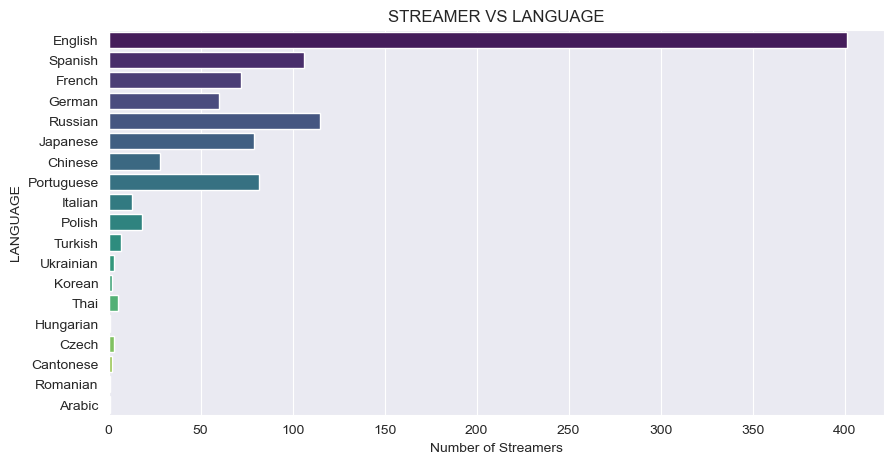

In [9]:
plot_category("LANGUAGE")


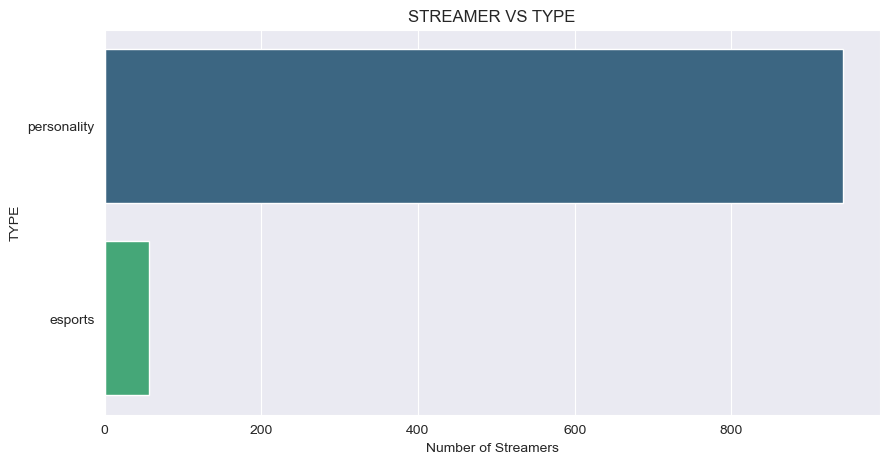

In [10]:
plot_category("TYPE")

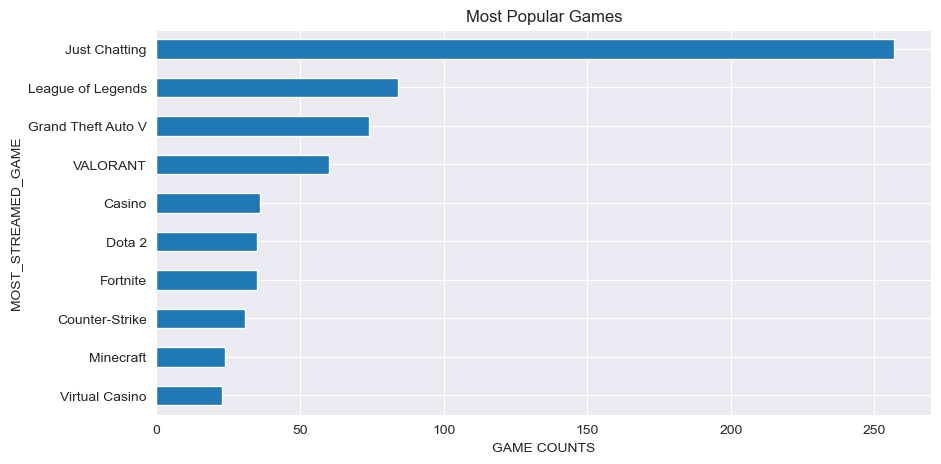

In [11]:
plt.figure(figsize=(10, 5))
df["MOST_STREAMED_GAME"].value_counts().head(10).sort_values(ascending=True).plot(kind="barh")
plt.title("Most Popular Games")
plt.xlabel("GAME COUNTS")
plt.show()

In [12]:
def popular_by_language(language):
  x_df = df[df["LANGUAGE"]==language].sort_values(by="TOTAL_FOLLOWERS", ascending=False).head(10)
  plt.figure(figsize=(10, 4))
  sns.barplot(x="NAME", y="TOTAL_FOLLOWERS", data=x_df)
  plt.title(f"{language} Popular Streamers")
  plt.tight_layout()
  plt.show()

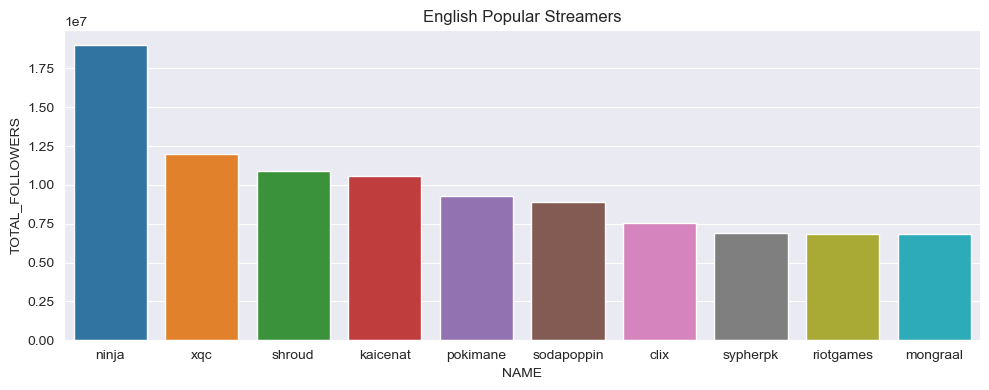

In [13]:
popular_by_language("English")


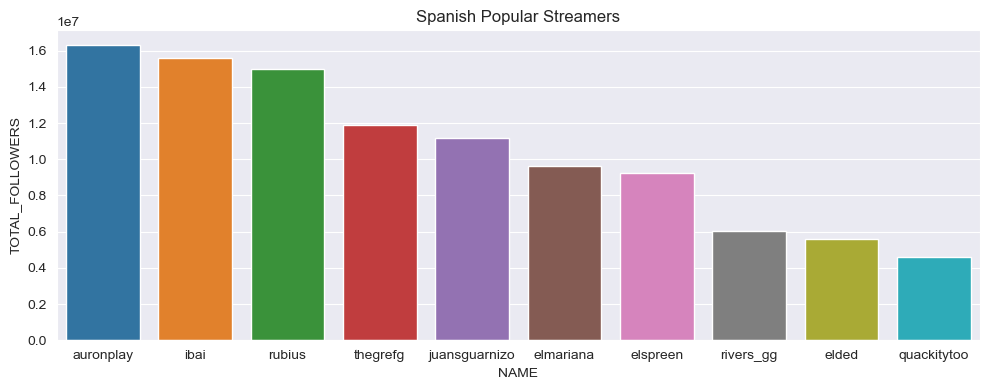

In [14]:
popular_by_language("Spanish")

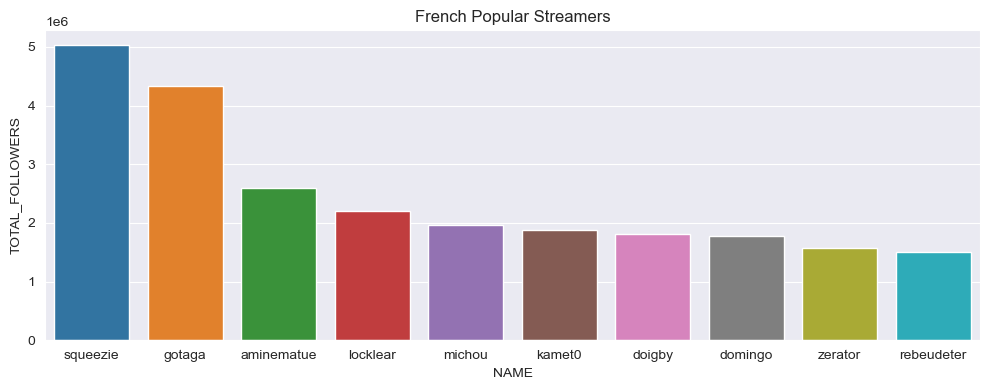

In [15]:
popular_by_language("French")

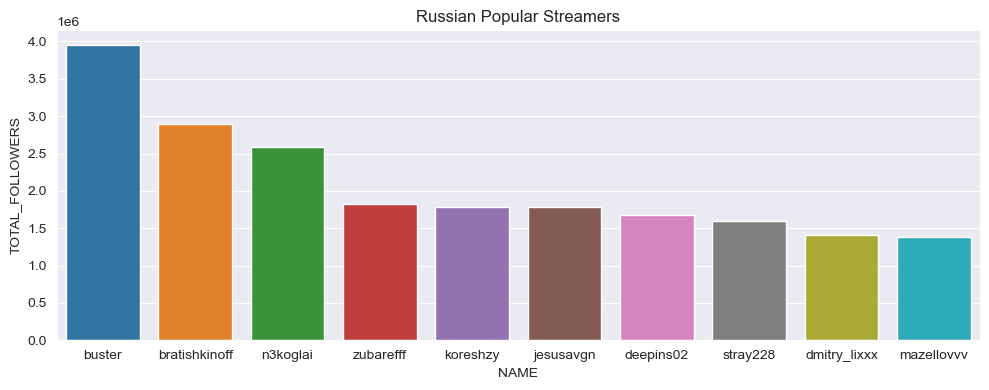

In [16]:
popular_by_language("Russian")

In [17]:
x_df = df.sort_values(by="TOTAL_FOLLOWERS", ascending=False)
language = x_df.groupby("LANGUAGE")
top_global = language.first().reset_index()[["NAME", "LANGUAGE", "TOTAL_FOLLOWERS"]]
top_global

,NAME,LANGUAGE,TOTAL_FOLLOWERS
0,imod,Arabic,160000
1,irissiri129,Cantonese,280000
2,asiagodtonegg3be0,Chinese,565000
3,agraelus,Czech,700000
4,ninja,English,19000000
5,squeezie,French,5030000
6,montanablack88,German,5340000
7,2okos,Hungarian,229000
8,zanoxvii,Italian,1820000
9,fps_shaka,Japanese,1420000


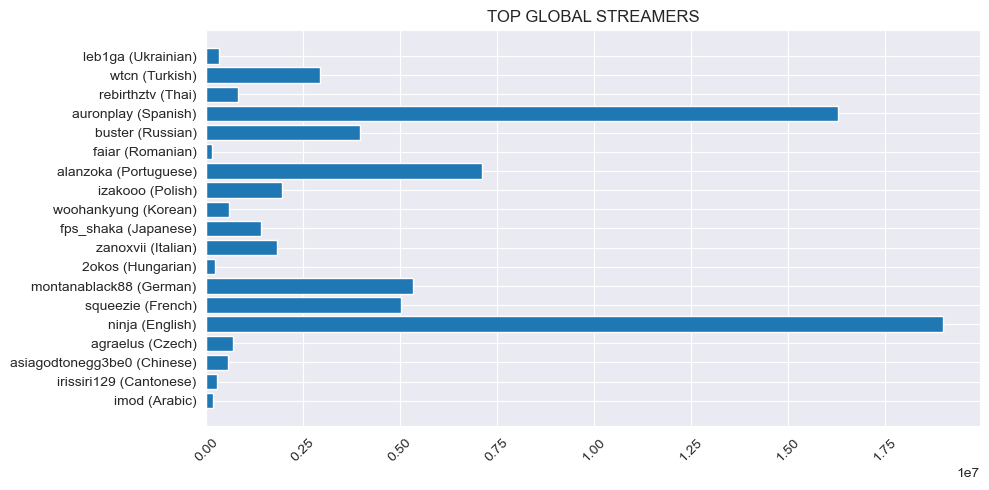

In [18]:
top_global["STREAMERS"] = top_global["NAME"] + " (" + top_global["LANGUAGE"] + ")"
plt.figure(figsize=(10, 5))
plt.barh(top_global["STREAMERS"], top_global["TOTAL_FOLLOWERS"])
plt.xticks(rotation=45)
plt.title("TOP GLOBAL STREAMERS")
plt.tight_layout()
plt.show()

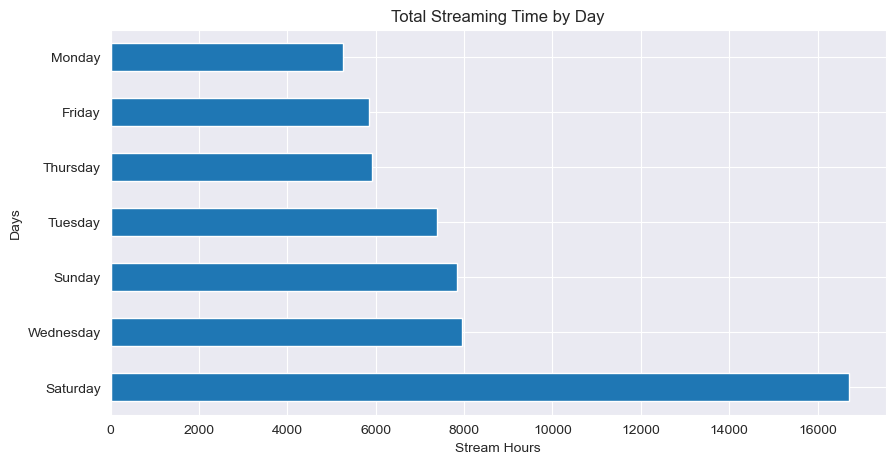

In [19]:
days = df.groupby("MOST_ACTIVE_DAY")
plt.figure(figsize=(10, 5))
days['TOTAL_TIME_STREAMED'].sum().sort_values(ascending=False).plot(kind="barh")
plt.title("Total Streaming Time by Day")
plt.xlabel("Stream Hours")
plt.ylabel("Days")
plt.show()

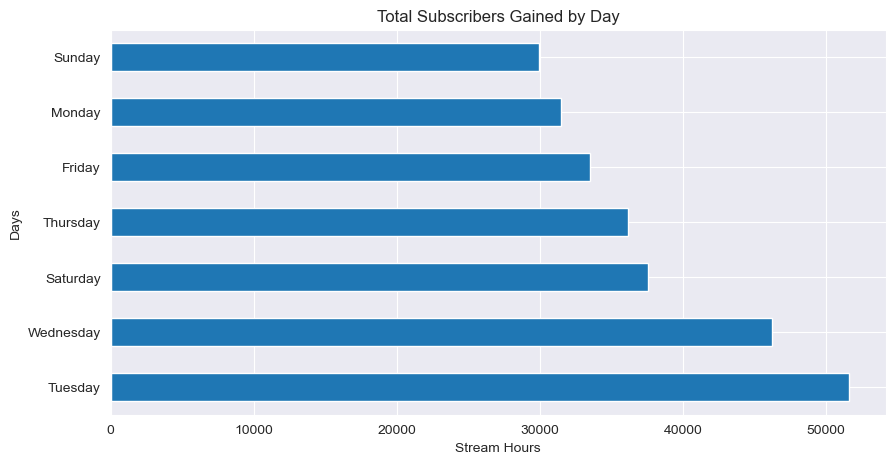

In [20]:
days = df.groupby("MOST_ACTIVE_DAY")
plt.figure(figsize=(10, 5))
days["FOLLOWERS_GAINED_PER_STREAM"].sum().sort_values(ascending=False).plot(kind="barh")
plt.title("Total Subscribers Gained by Day")
plt.xlabel("Stream Hours")
plt.ylabel("Days")
plt.show()

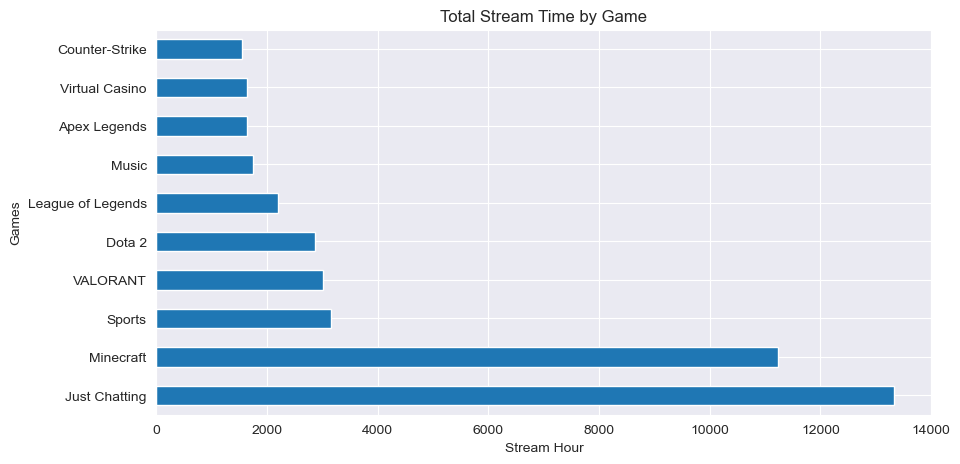

In [21]:
games = df.groupby("MOST_STREAMED_GAME")
plt.figure(figsize=(10, 5))
games["TOTAL_TIME_STREAMED"].sum().sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Total Stream Time by Game")
plt.ylabel("Games")
plt.xlabel("Stream Hour")
plt.show()

In [22]:
x = df["TOTAL_TIME_STREAMED"]
x.mean(), x.median(), x.mode()

(56.96176876876877,
 7.14,
 0    6.0
 1    7.0
 Name: TOTAL_TIME_STREAMED, dtype: float64)

In [23]:
def distribution(col):
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    sns.distplot(df[col], ax=axes[0])
    axes[0].set_title(f'Skewness of {df[col].skew():.3f}')
    axes[0].set_xlabel(col)

    sns.boxplot(x=df[col], ax=axes[1])
    axes[1].set_title(f'Quartile')

    plt.tight_layout()
    plt.show()

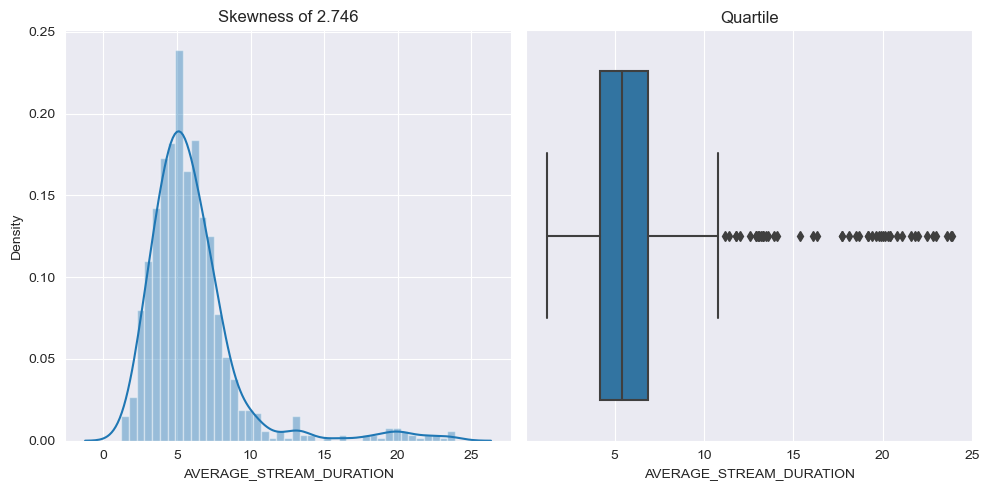

In [24]:
distribution("AVERAGE_STREAM_DURATION")


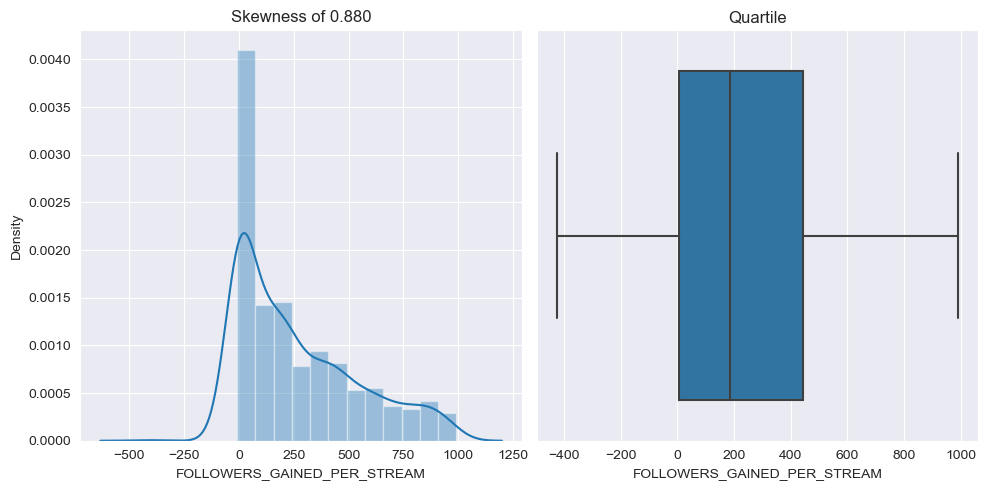

In [25]:
distribution("FOLLOWERS_GAINED_PER_STREAM")

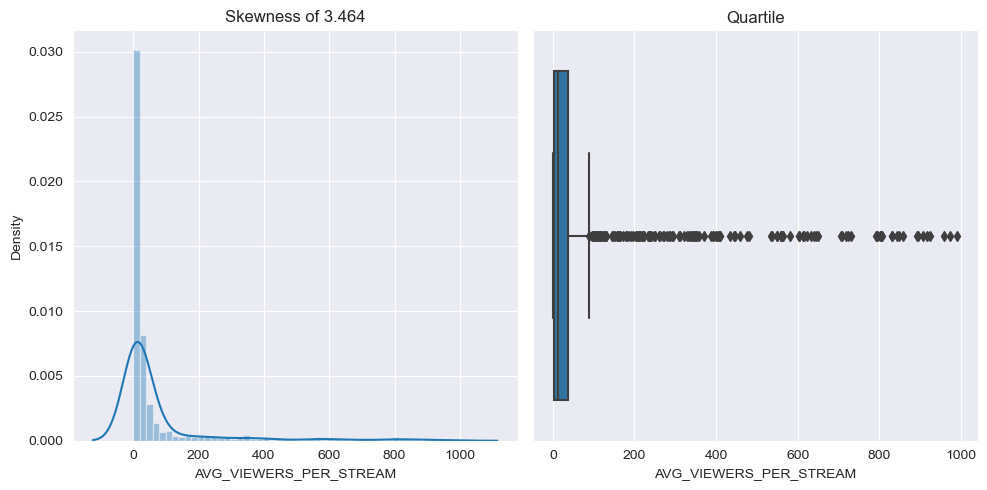

In [26]:
distribution("AVG_VIEWERS_PER_STREAM")

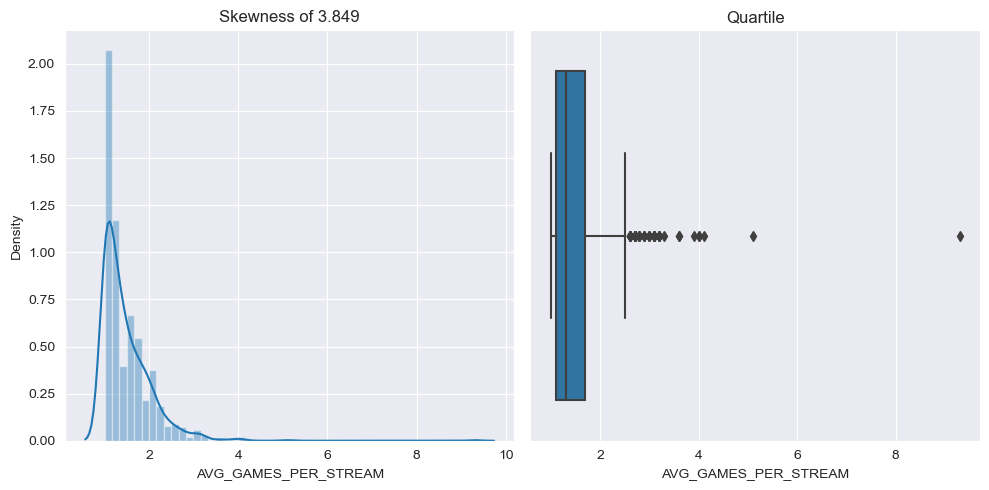

In [27]:
distribution("AVG_GAMES_PER_STREAM")

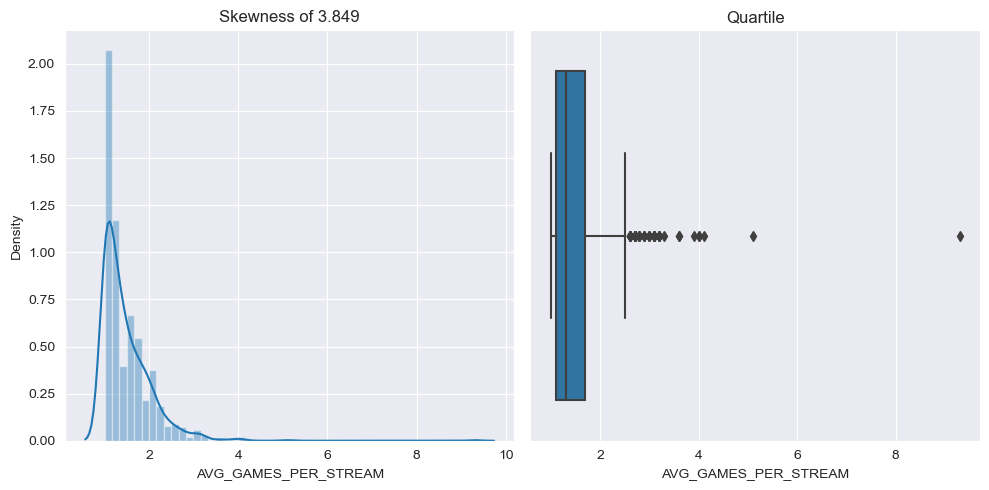

In [28]:
distribution("AVG_GAMES_PER_STREAM")

In [29]:
def correlation(col1, col2):
  correlation = df[col1].corr(df[col2])
  plt.figure(figsize=(10,5))
  sns.scatterplot(x=col1, y=col2, data=df, hue=col2, palette="viridis")
  plt.title(f"Correlation: {correlation:.3f}")
  plt.tight_layout()
  plt.show()

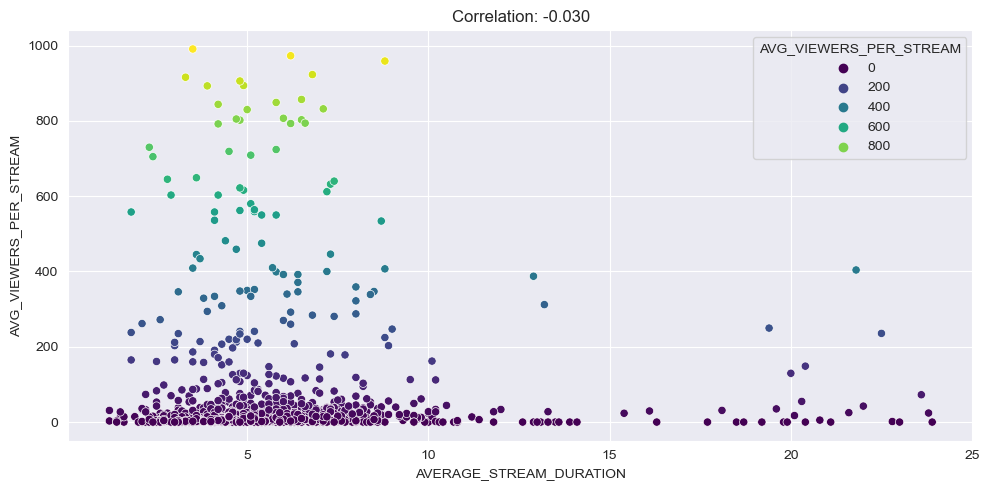

In [30]:
correlation("AVERAGE_STREAM_DURATION", "AVG_VIEWERS_PER_STREAM")

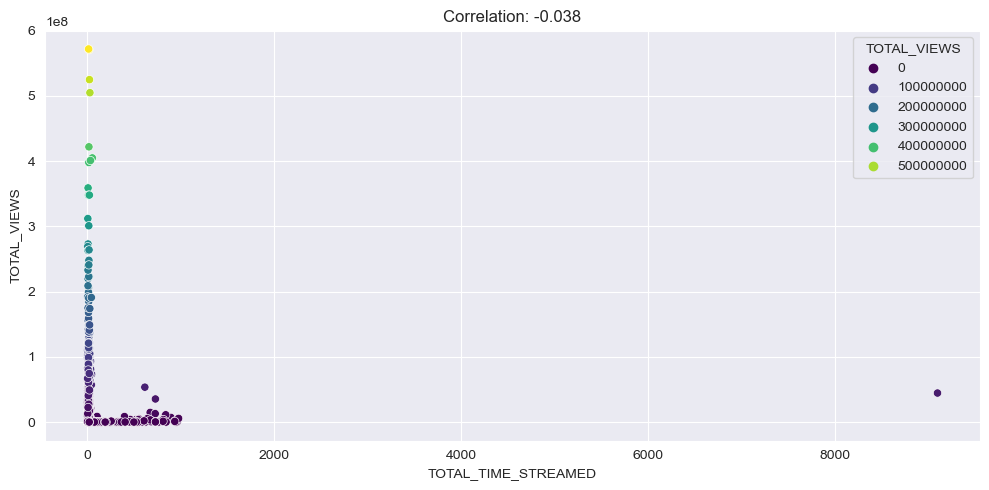

In [31]:
correlation("TOTAL_TIME_STREAMED", "TOTAL_VIEWS")

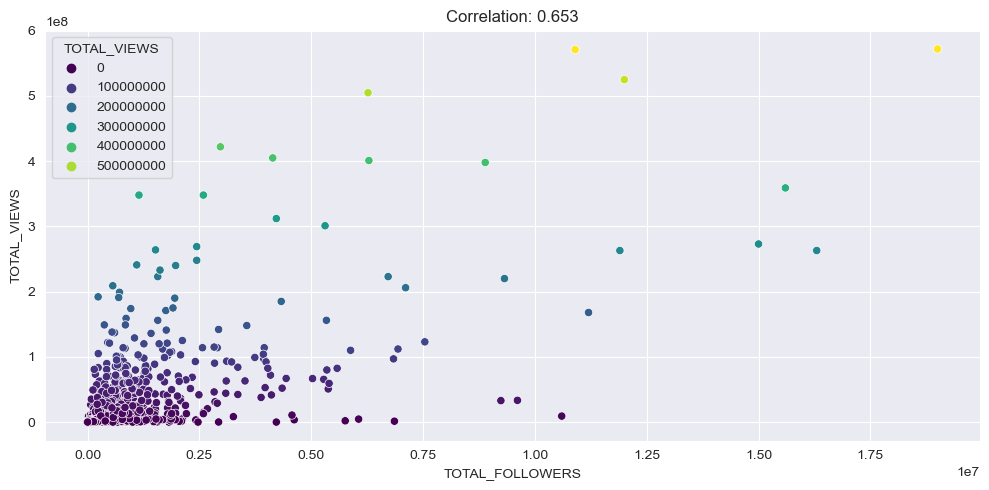

In [32]:
correlation("TOTAL_FOLLOWERS", "TOTAL_VIEWS")

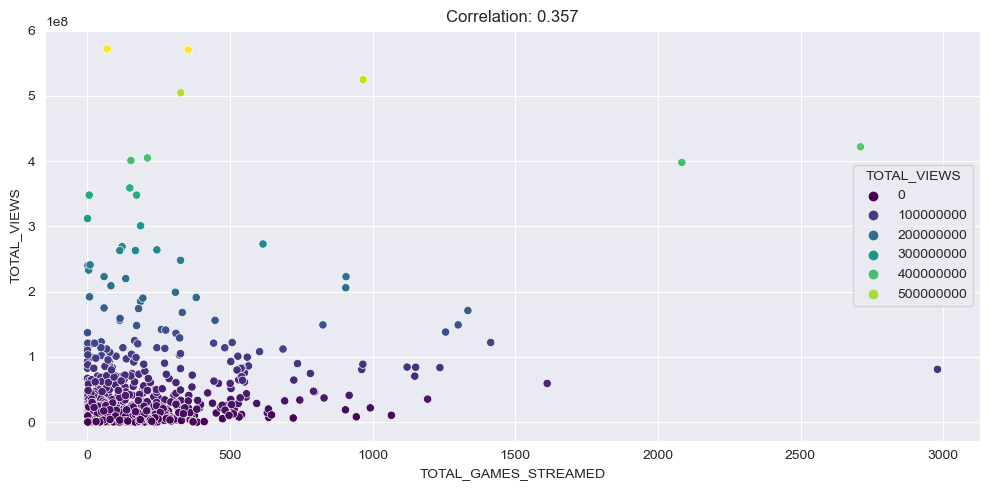

In [33]:
correlation("TOTAL_GAMES_STREAMED", "TOTAL_VIEWS")

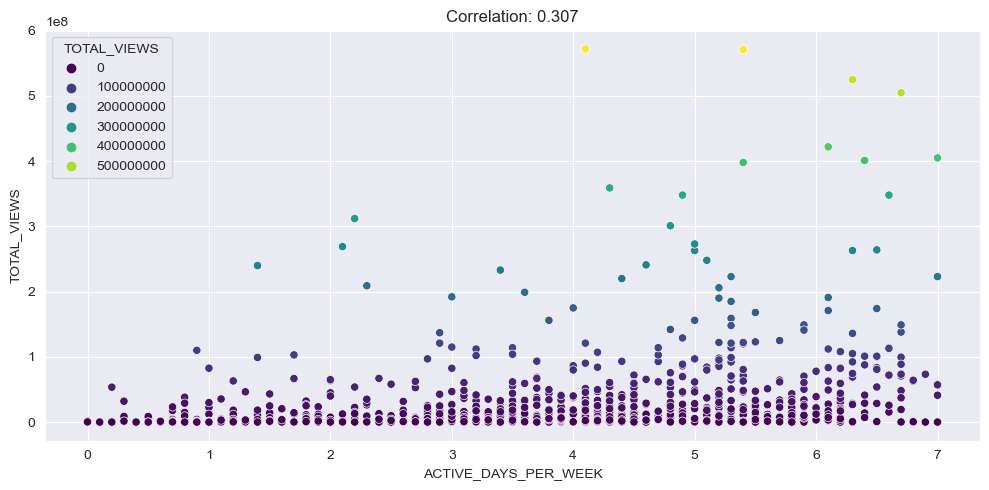

In [34]:
correlation("ACTIVE_DAYS_PER_WEEK", "TOTAL_VIEWS")

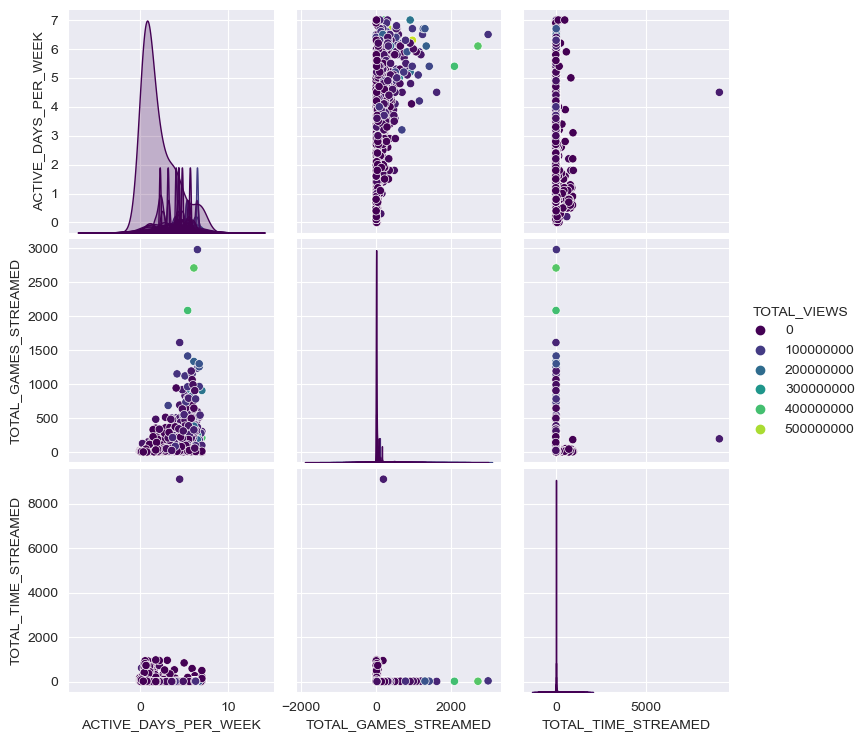

In [35]:
x_df = df[["ACTIVE_DAYS_PER_WEEK", "TOTAL_GAMES_STREAMED", "TOTAL_TIME_STREAMED", "TOTAL_VIEWS"]]
sns.pairplot(data=x_df, hue="TOTAL_VIEWS", palette="viridis")
plt.show()

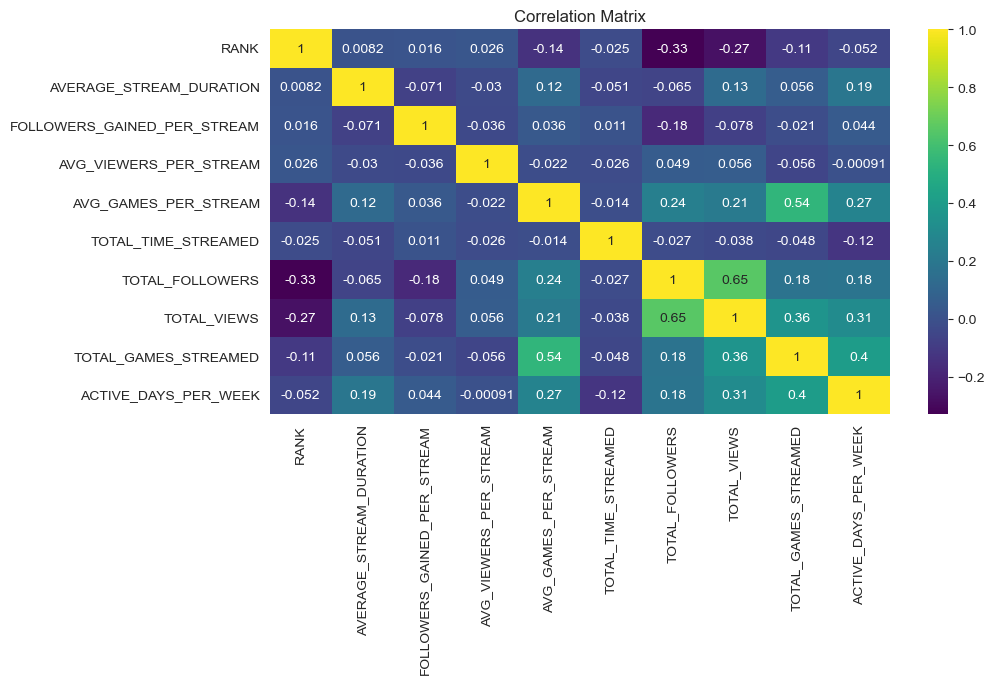

In [36]:
x = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10, 5))
sns.heatmap(df[x].corr(), annot=True, cmap='viridis')
plt.title('Correlation Matrix')
plt.show()